<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/Week3%20Employee%20Attrition%20Prediction%20using%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO 371: Data Mining Applications

## Week 3: Employee Attrition Using KNN
### Prof. Charles Dorner, EdD (Candidate)
### College of Computing and Informatics, Drexel University



In [11]:
#Impot Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import random


In [12]:
X, y = make_classification(n_samples=150,
                           n_features=4,
                           n_informative=3,
                           n_redundant=0,
                           n_classes=2,
                           weights=[0.7, 0.3],
                           class_sep=1.8,
                           random_state=42)

df = pd.DataFrame(X, columns=['satisfaction_score', 'workload_level', 'overtime_hours', 'years_at_company'])
df['attrition'] = y
df.head()



,satisfaction_score,workload_level,overtime_hours,years_at_company,attrition
0,-1.924070,-1.783057,2.136956,-0.007973,0
1,-3.378496,-1.932581,-0.507804,1.201214,0
2,-1.408552,-1.432202,1.662099,-1.422254,0
3,-0.799289,-1.426474,-2.553701,-0.856084,0
4,-1.648976,-1.283757,-1.781756,0.333662,0


In [13]:
#Extract Features and Targets
X_train = df.drop('attrition', axis=1)
y_train = df['attrition']


In [14]:
#Train KNN on Raw Data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
print("Predictions:", y_pred)


Predictions: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0
 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0
 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0
 1 0]


In [15]:
#Evaluate Model Performance
acc = accuracy_score(y_train, y_pred)
print("Accuracy:", acc)
precision, recall, f1, support = precision_recall_fscore_support(y_train, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Support:", support)


Accuracy: 0.9866666666666667
Precision: [0.98130841 1.        ]
Recall: [1.         0.95555556]
F1 Score: [0.99056604 0.97727273]
Support: [105  45]


In [17]:
#Apply Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_scaled)

print("Accuracy with Scaling:", accuracy_score(y_train, y_pred_scaled))


Accuracy with Scaling: 0.98


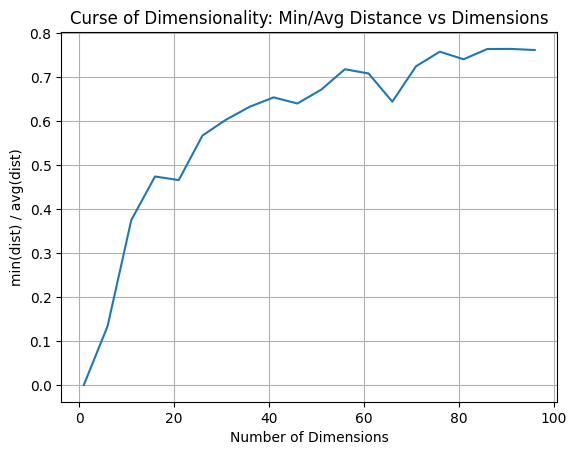

In [19]:
#Visualize Curse of Dimensionality
def random_distances(dim, num_pairs=10000):
    return [distance.euclidean(np.random.rand(dim), np.random.rand(dim)) for _ in range(num_pairs)]

dimensions = range(1, 101, 5)
avg_distances = []
min_distances = []

for dim in dimensions:
    dists = random_distances(dim)
    avg_distances.append(np.mean(dists))
    min_distances.append(min(dists))

plt.plot(dimensions, np.array(min_distances) / np.array(avg_distances))
plt.title("Curse of Dimensionality: Min/Avg Distance vs Dimensions")
plt.xlabel("Number of Dimensions")
plt.ylabel("min(dist) / avg(dist)")
plt.grid(True)
plt.show()
